1. a) Bernoulli(0.5) 
   b) Uniform[0,1] 
   c) Exponential(1)
   d) Cauchy

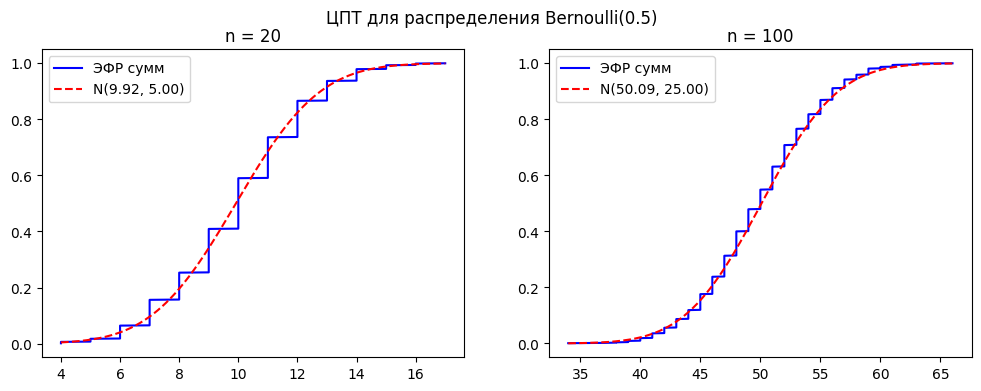

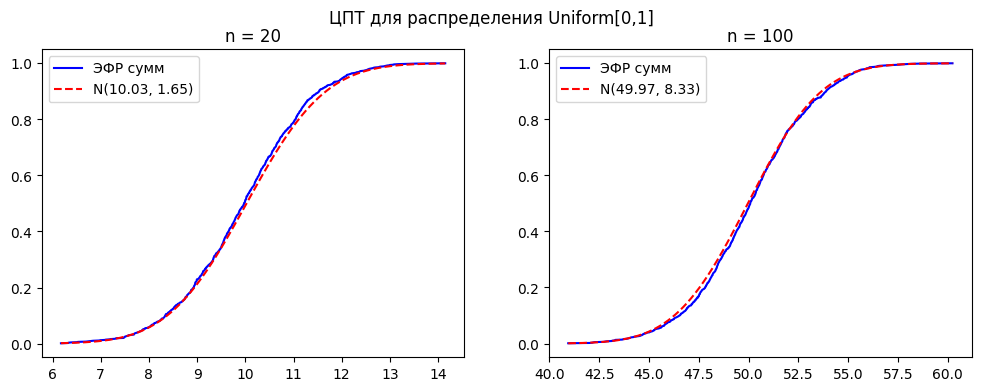

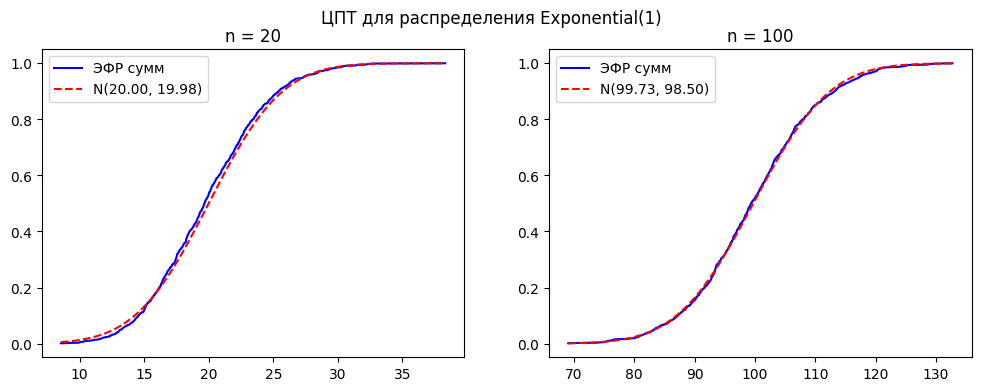

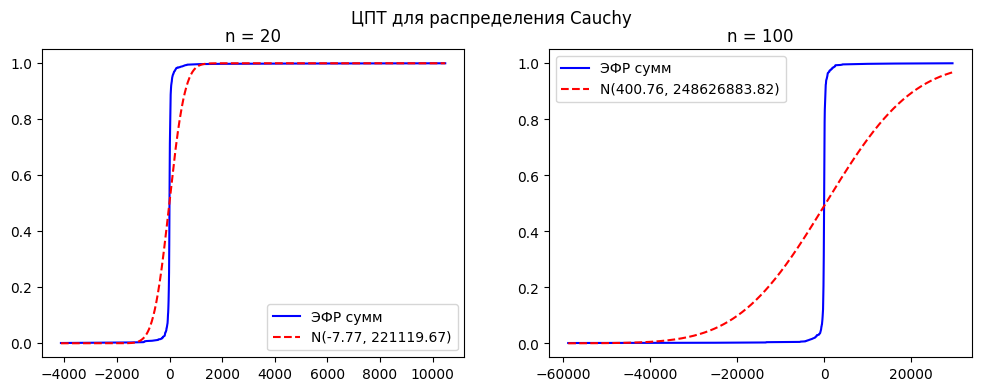

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, uniform, expon, cauchy, norm

def plot_clt(dist_name, dist_func, params, n_list=[20, 100], k=1000):
    '''
    params: tuple - параметры распределения (например, (0,1) для uniform)
    n_list: list - список размеров выборок [n1, n2, ...]
    k: int - количество повторений (строк)
    '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'ЦПТ для распределения {dist_name}')
    
    for idx, n in enumerate(n_list):
        sums = []
        for _ in range(k):
            sample = dist_func(*params, size=n)
            sums.append(np.sum(sample))
        
        # ЭФР
        sorted_sums = np.sort(sums)
        ecdf = np.arange(1, k+1) / k
        # np.arange(1, k+1): создает массив [1, 2, 3, ..., 1000]
        # Деление на k: получаем значения от 1/k до 1
        # Это значения эмпирической функции распределения
        
        # Теоретическая нормальная ФР
        all_samples = dist_func(*params, size=k*n)
        mean_all = np.mean(all_samples)
        var_all = np.var(all_samples)
        
        x_norm = np.linspace(min(sorted_sums), max(sorted_sums), 1000)
        # np.linspace(): равномерно распределенные числа от min до max

        cdf_norm = norm.cdf(x_norm, loc=n*mean_all, scale=np.sqrt(n*var_all))
        
        axes[idx].plot(sorted_sums, ecdf, label='ЭФР сумм', color='blue')
        # Построение графика теоретической нормальной ФР
        axes[idx].plot(x_norm, cdf_norm, label=f'N({n*mean_all:.2f}, {n*var_all:.2f})', color='red', linestyle='--')
        # x_norm: точки по оси X
        # cdf_norm: значения нормальной ФР
        # f'...': форматированная строка с параметрами
        # :.2f - округление до 2 знаков после запятой
        # linestyle='--': пунктирная линия
        axes[idx].set_title(f'n = {n}')
        axes[idx].legend()
    
    plt.show()

# Примеры распределений:
plot_clt('Bernoulli(0.5)', bernoulli.rvs, (0.5,))
plot_clt('Uniform[0,1]', uniform.rvs, (0, 1))
plot_clt('Exponential(1)', expon.rvs, (0, 1))
plot_clt('Cauchy', cauchy.rvs, (0, 1))

 Задача 2: Пусть X ~ Gamma(n, 4). Построить на одном графике графики плотности 
    распределения с.в. (X - EX)/√DX и плотности N(0,1) для различных n.

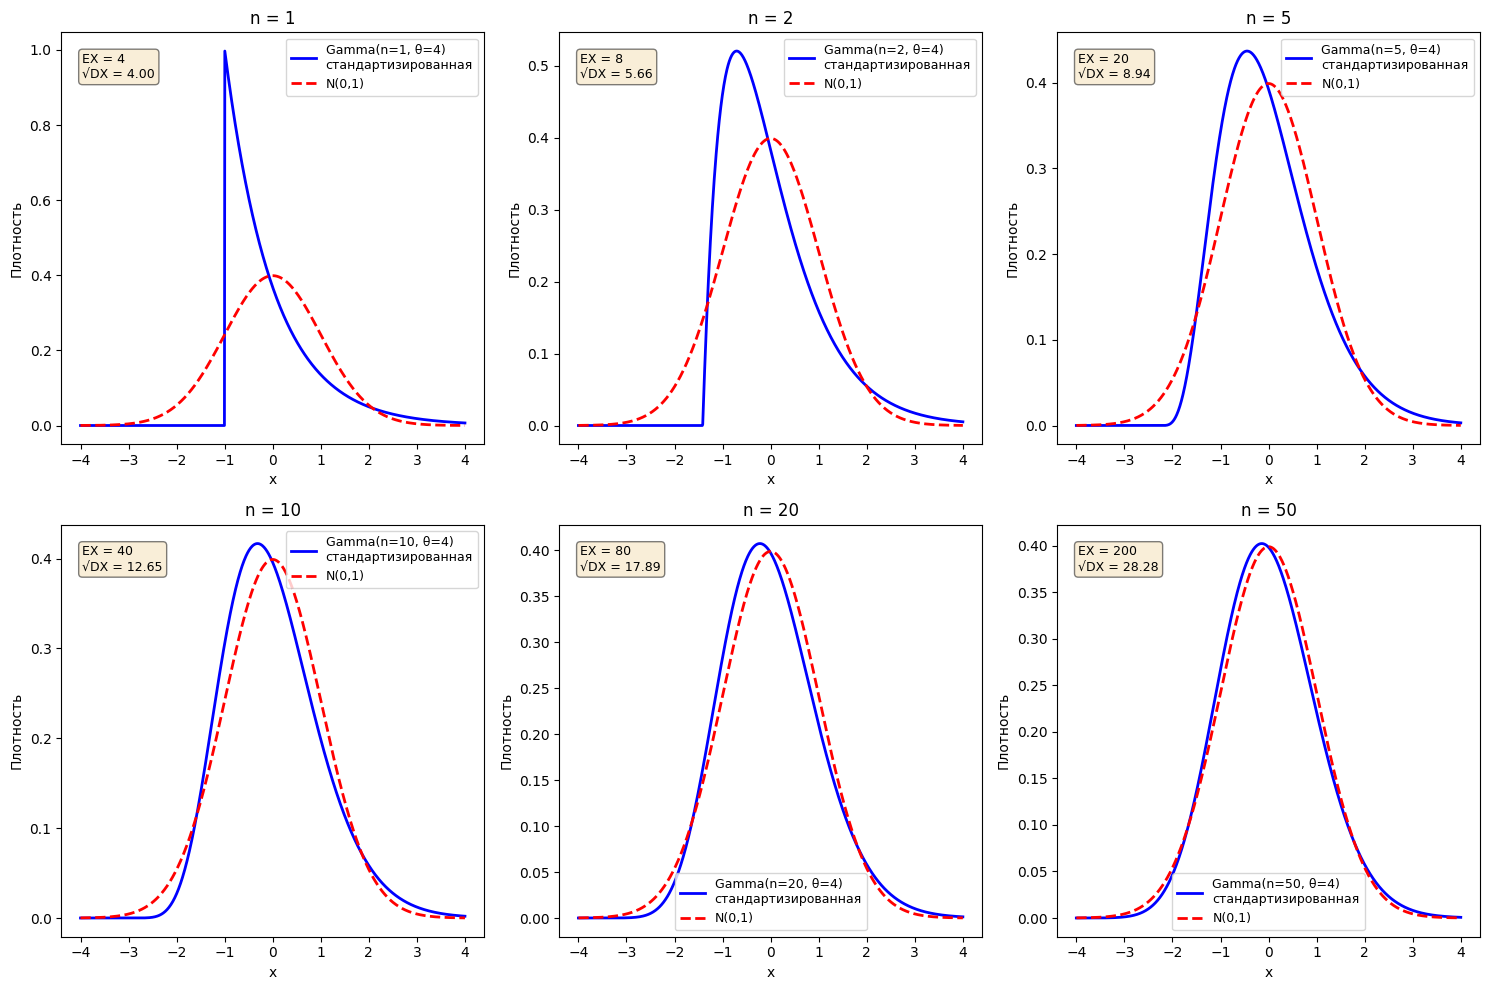

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

# Параметры гамма-распределения: shape = n, scale = 4
# EX = n * scale = n * 4
# DX = n * scale^2 = n * 16
# Стандартизированная величина: (X - n*4) / (4*sqrt(n))

def plot_gamma_norm_comparison(n_values=[1, 2, 5, 10, 20, 50]):
    """
    Сравнение плотности центрированной и нормированной гамма-величины 
    с плотностью стандартного нормального распределения
    """
    
    # Создаём фигуру с подграфиками
    # Будем строить графики в сетке 2x3 (для 6 значений n)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Преобразуем axes в плоский массив для удобства итерации
    axes_flat = axes.flatten()
    
    # Задаём диапазон x для всех графиков
    x = np.linspace(-4, 4, 1000)
    
    # Плотность стандартного нормального распределения (будет одинакова на всех графиках)
    norm_pdf = norm.pdf(x)
    
    # Перебираем разные значения n
    for idx, n in enumerate(n_values):
        scale = 4 
        
        # Математическое ожидание и дисперсия Gamma(n, 4)
        mean_gamma = n * scale  # EX = n * θ
        std_gamma = np.sqrt(n) * scale  # √DX = √(n * θ^2) = θ * √n
        
        # Создаём случайную величину Y = (X - EX) / √DX
        # Для этого нужно преобразовать x обратно в шкалу гамма-распределения
        # y = (x_gamma - mean_gamma) / std_gamma
        # => x_gamma = y * std_gamma + mean_gamma
        
        # Вычисляем значения x в шкале исходного гамма-распределения
        x_gamma = x * std_gamma + mean_gamma
        
        # Вычисляем плотность гамма-распределения в точках x_gamma
        gamma_pdf_original = gamma.pdf(x_gamma, a=n, scale=scale)
        
        # Преобразуем плотность в плотность стандартизированной величины
        # По формуле преобразования плотности: f_Y(y) = f_X(x(y)) * |dx/dy|
        # где x(y) = y * std_gamma + mean_gamma, dx/dy = std_gamma
        gamma_pdf_standardized = gamma_pdf_original * std_gamma
        
        axes_flat[idx].plot(x, gamma_pdf_standardized, 
                          label=f'Gamma(n={n}, θ=4)\nстандартизированная', 
                          color='blue', linewidth=2)
        axes_flat[idx].plot(x, norm_pdf, 
                          label='N(0,1)', 
                          color='red', linestyle='--', linewidth=2)
        
        axes_flat[idx].set_title(f'n = {n}')
        axes_flat[idx].set_xlabel('x')
        axes_flat[idx].set_ylabel('Плотность')
        axes_flat[idx].legend(loc='best', fontsize=9)
        
        # Добавляем информацию о параметрах
        textstr = f'EX = {mean_gamma}\n√DX = {std_gamma:.2f}'
        axes_flat[idx].text(0.05, 0.95, textstr, transform=axes_flat[idx].transAxes,
                          fontsize=9, verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    
    # Делаем отступы между графиками
    plt.tight_layout() 
    plt.show()
plot_gamma_norm_comparison()

Построить гистограмму по набору значений с.в. Sn = X1 + . . . + Xn − μn (генерируем k выборок
X1, . . . , Xn, по каждой находим одно значение суммы). На том же графике построить плотность
распределения c.в. Sn (для дискретных – дискретное распределение) и плотность N (0, σ2n).
Здесь распределения Xi рассматриваются следующие:
• 1 вариант: P oiss(λ), 2 вариант: Geom(p),
• 1 вариант: exp(λ), 2 вариант: Gamma(a, b).

• * Для всех вариантов R[0, 1] (для поиска плотности распределения суммы можно исполь-
зовать sympy.stats.UniformSum() или написать формулу самостоятельно, см. распределение Ирвина–Холла),

Параметры: n=10, k=10000 (моделируемых сумм)

1. Poisson(λ=3)


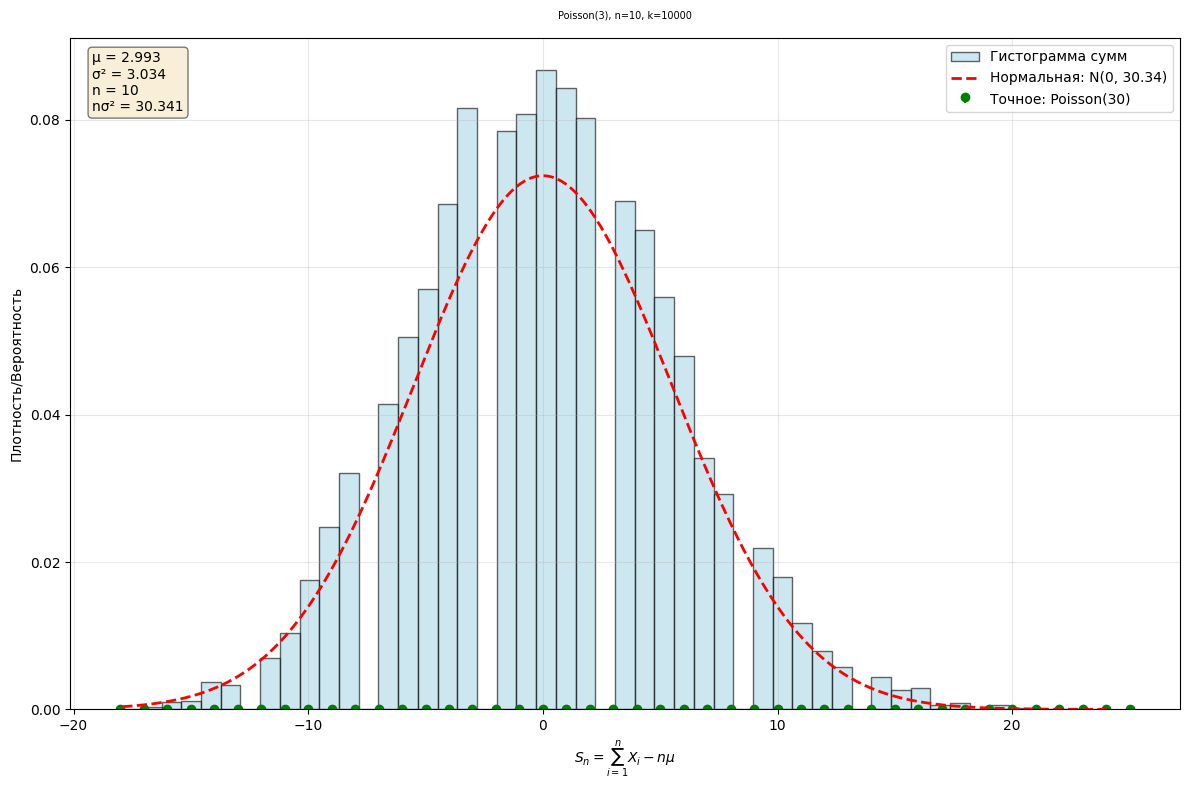

Poisson(3):
  Оценка μ = 2.9928, σ² = 3.0341
  Нормальная аппроксимация: N(0, 30.3407)

2. Geometric(p=0.3)


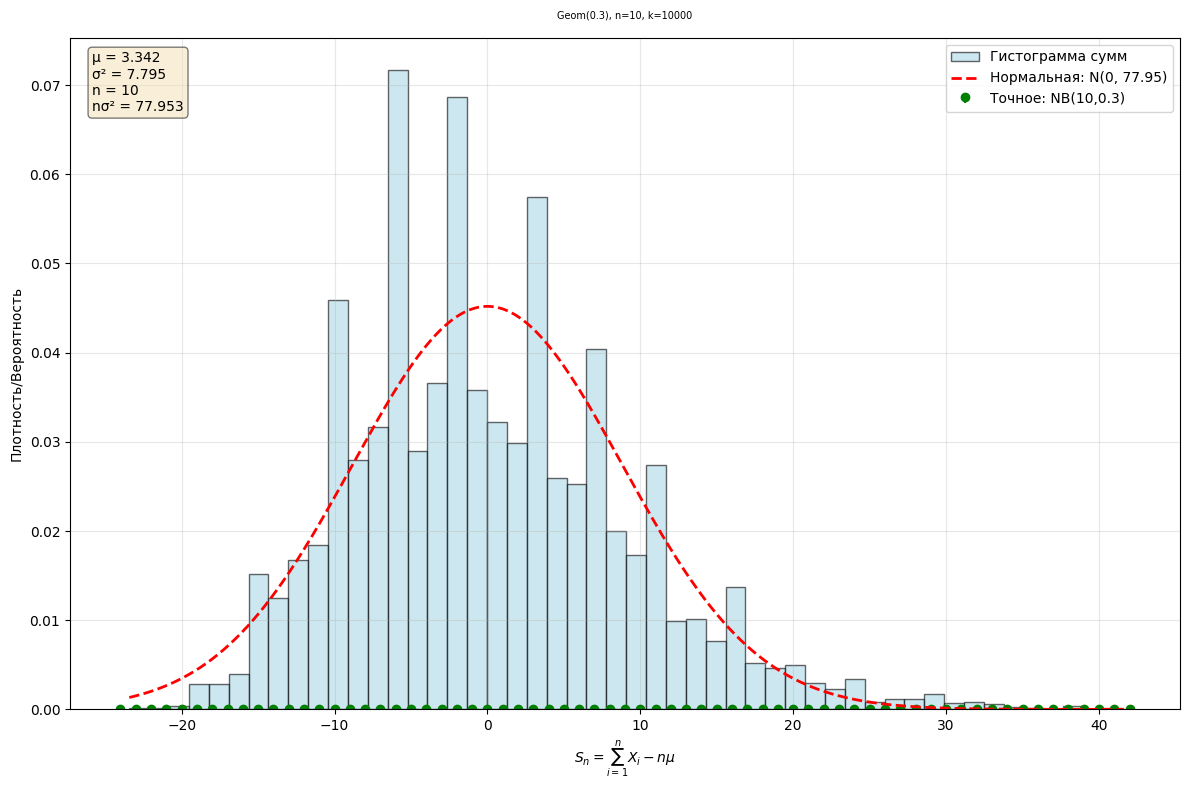

Geom(0.3):
  Оценка μ = 3.3424, σ² = 7.7953
  Нормальная аппроксимация: N(0, 77.9527)

3. Exponential(λ=1)


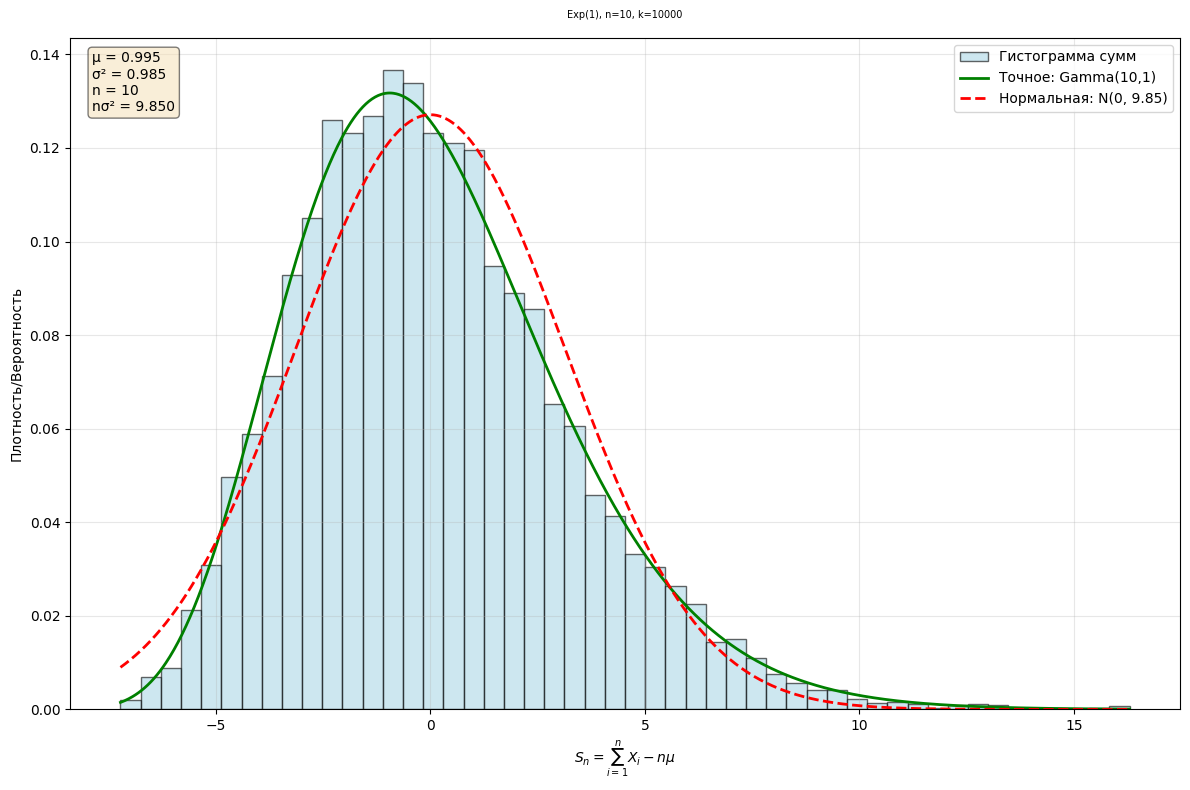

Exp(1):
  Оценка μ = 0.9948, σ² = 0.9850
  Нормальная аппроксимация: N(0, 9.8499)

4. Gamma(a=2, b=1)


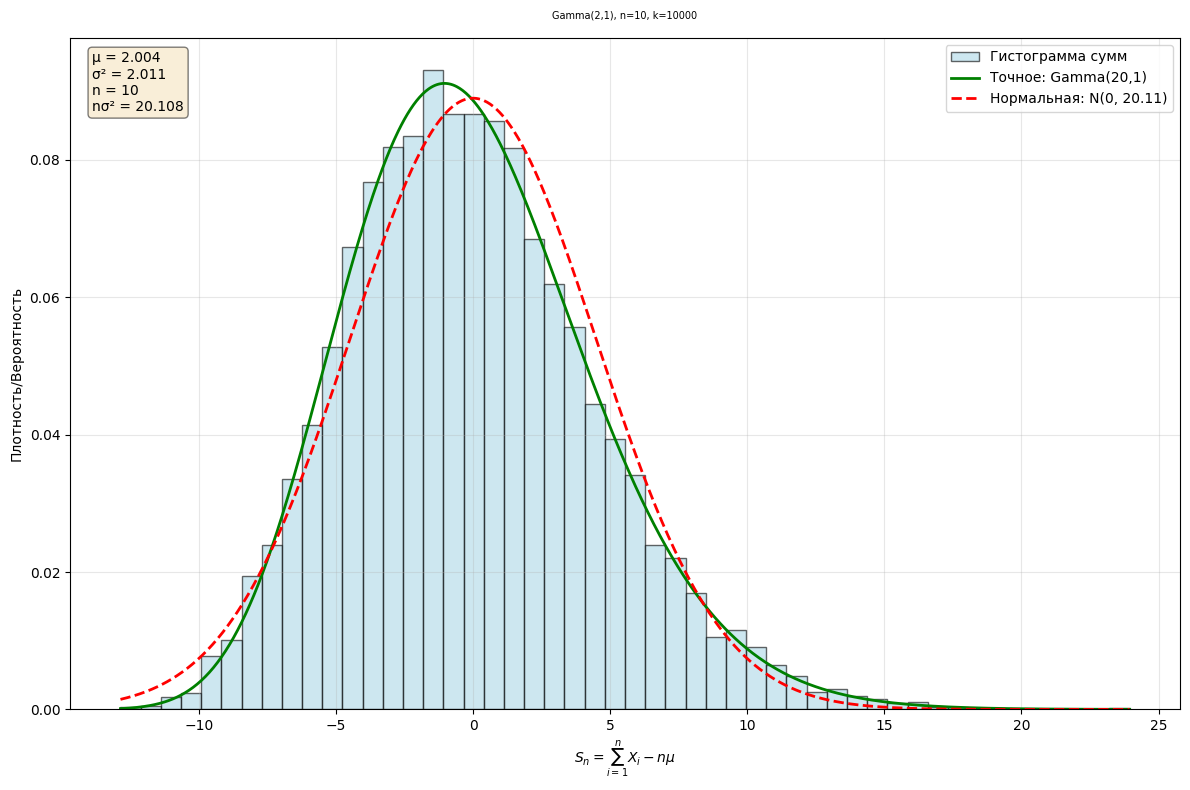

Gamma(2,1):
  Оценка μ = 2.0042, σ² = 2.0108
  Нормальная аппроксимация: N(0, 20.1080)



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, geom, expon, gamma, uniform, norm
from scipy.special import comb
import warnings
warnings.filterwarnings('ignore')

def plot_sum_distribution(dist_name, dist_func, params, n=10, k=10000):
    """
    Задача 3: Построение гистограммы сумм и сравнение с нормальной аппроксимацией
    
    dist_name: название распределения
    dist_func: функция для генерации случайных величин
    params: параметры распределения
    n: количество слагаемых в сумме
    k: количество моделируемых сумм
    """
    
    # 1. Генерация k сумм по n слагаемых
    sums = []
    for _ in range(k):
        sample = dist_func(*params, size=n)
        sums.append(np.sum(sample))
    sums = np.array(sums)
    
    # 2. Оценка параметров по всем данным
    all_samples = dist_func(*params, size=100000)
    mu = np.mean(all_samples)
    sigma2 = np.var(all_samples)
    
    # 3. Центрированные суммы: S_n = сумма - n*μ
    centered_sums = sums - n * mu
    
    # 4. Создание графика
    plt.figure(figsize=(12, 8))
    
    # 5. Гистограмма центрированных сумм
    plt.hist(centered_sums, bins=50, density=True, alpha=0.6, 
             color='lightblue', edgecolor='black', label='Гистограмма сумм')
    
    # 6. Точное распределение суммы (для дискретных - дискретное)
    if dist_name == 'Poisson(3)':
        # Дискретное распределение суммы n Poisson(λ) ~ Poisson(nλ)
        x_min = int(np.floor(centered_sums.min()))
        x_max = int(np.ceil(centered_sums.max()))
        x_vals = np.arange(x_min, x_max + 1)
        pmf_vals = poisson.pmf(x_vals + n*mu, n*params[0])
        plt.stem(x_vals, pmf_vals, linefmt='green', markerfmt='go', 
                basefmt=' ', label=f'Точное: Poisson({n*params[0]})')
    
    elif dist_name == 'Geom(0.3)':
        # Дискретное распределение суммы n Geom(p)
        # Сумма n Geom(p) ~ NegativeBinomial(n, p) со сдвигом
        x_min = int(np.floor(centered_sums.min()))
        x_max = int(np.ceil(centered_sums.max()))
        x_vals = np.arange(x_min, x_max + 1)
        
        # Используем отрицательное биномиальное распределение
        from scipy.stats import nbinom
        # Для Geom(p): μ = 1/p, сумма n таких ~ NB(n, p) со сдвигом
        p = params[0]
        pmf_vals = nbinom.pmf(x_vals + n*mu - n, n, p)
        plt.stem(x_vals, pmf_vals, linefmt='green', markerfmt='go', 
                basefmt=' ', label=f'Точное: NB({n},{p})')
    
    elif dist_name == 'Exp(1)':
        # Непрерывное распределение: сумма n Exp(1) ~ Gamma(n, 1)
        x_vals = np.linspace(centered_sums.min(), centered_sums.max(), 1000)
        pdf_vals = gamma.pdf(x_vals + n*mu, a=n, scale=params[1])
        plt.plot(x_vals, pdf_vals, 'g-', linewidth=2, label=f'Точное: Gamma({n},1)')
    
    elif dist_name == 'Gamma(2,1)':
        # Непрерывное распределение: сумма n Gamma(2,1) ~ Gamma(2n, 1)
        x_vals = np.linspace(centered_sums.min(), centered_sums.max(), 1000)
        pdf_vals = gamma.pdf(x_vals + n*mu, a=n*params[0], scale=params[2])
        plt.plot(x_vals, pdf_vals, 'g-', linewidth=2, label=f'Точное: Gamma({2*n},1)')
    
    # 7. Нормальная аппроксимация N(0, nσ²)
    x_norm = np.linspace(centered_sums.min(), centered_sums.max(), 1000)
    norm_pdf = norm.pdf(x_norm, loc=0, scale=np.sqrt(n * sigma2))
    plt.plot(x_norm, norm_pdf, 'r--', linewidth=2, 
             label=f'Нормальная: N(0, {n*sigma2:.2f})')
    
    # 8. Настройки графика
    plt.title(f'{dist_name}, n={n}, k={k}\n', fontsize=7)
    plt.xlabel(r'$S_n = \sum_{i=1}^n X_i - n\mu$')
    plt.ylabel('Плотность/Вероятность')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    
    # 9. Добавление информации о параметрах
    textstr = f'μ = {mu:.3f}\nσ² = {sigma2:.3f}\nn = {n}\nnσ² = {n*sigma2:.3f}'
    plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # 10. Вывод информации
    print(f"{dist_name}:")
    print(f"  Оценка μ = {mu:.4f}, σ² = {sigma2:.4f}")
    print(f"  Нормальная аппроксимация: N(0, {n*sigma2:.4f})")
    print()

print("Параметры: n=10, k=10000 (моделируемых сумм)")
print()

# 1. Poisson(λ=3)
print("1. Poisson(λ=3)")
plot_sum_distribution('Poisson(3)', poisson.rvs, (3,), n=10, k=10000)

# 2. Geometric(p=0.3)
print("2. Geometric(p=0.3)")
plot_sum_distribution('Geom(0.3)', geom.rvs, (0.3,), n=10, k=10000)

# 3. Exponential(λ=1)
print("3. Exponential(λ=1)")
plot_sum_distribution('Exp(1)', expon.rvs, (0, 1), n=10, k=10000)

# 4. Gamma(a=2, b=1) - параметризация: shape=2, scale=1
print("4. Gamma(a=2, b=1)")
plot_sum_distribution('Gamma(2,1)', gamma.rvs, (2, 0, 1), n=10, k=10000)


4. Обозначим Y = (Sn − nμ)/(σ√n). Построить на одном графике: FY (x) − Φ(x), правую часть нера-
венства Берри–Эссеена, ее же, умноженную на -1, правую часть асимптотического разложения.
Рассмотреть n = 5, 10, 20, 50, 100, 500. Соотнести полученные результаты с теоремами 3 и 4. Рас-
смотрите следующие распределения Xi: Bern(p), exp(λ).

1. Распределение Бернулли: Bern(p=0.3)

----------------------------------------------------------------------
Распределение: Bernoulli(p=0.3)
----------------------------------------------------------------------
μ = 0.299710
σ = 0.458131
E|X-μ|³ = 0.121781
Коэффициент асимметрии a₃ = 0.874379
n =   5: Макс. отклонение = 0.224270, Граница Берри-Эссеена = 0.270968, Отношение = 0.828
n =  10: Макс. отклонение = 0.149586, Граница Берри-Эссеена = 0.191603, Отношение = 0.781
n =  20: Макс. отклонение = 0.108386, Граница Берри-Эссеена = 0.135484, Отношение = 0.800
n =  50: Макс. отклонение = 0.065986, Граница Берри-Эссеена = 0.085688, Отношение = 0.770
n = 100: Макс. отклонение = 0.044186, Граница Берри-Эссеена = 0.060590, Отношение = 0.729
n = 500: Макс. отклонение = 0.025221, Граница Берри-Эссеена = 0.027097, Отношение = 0.931


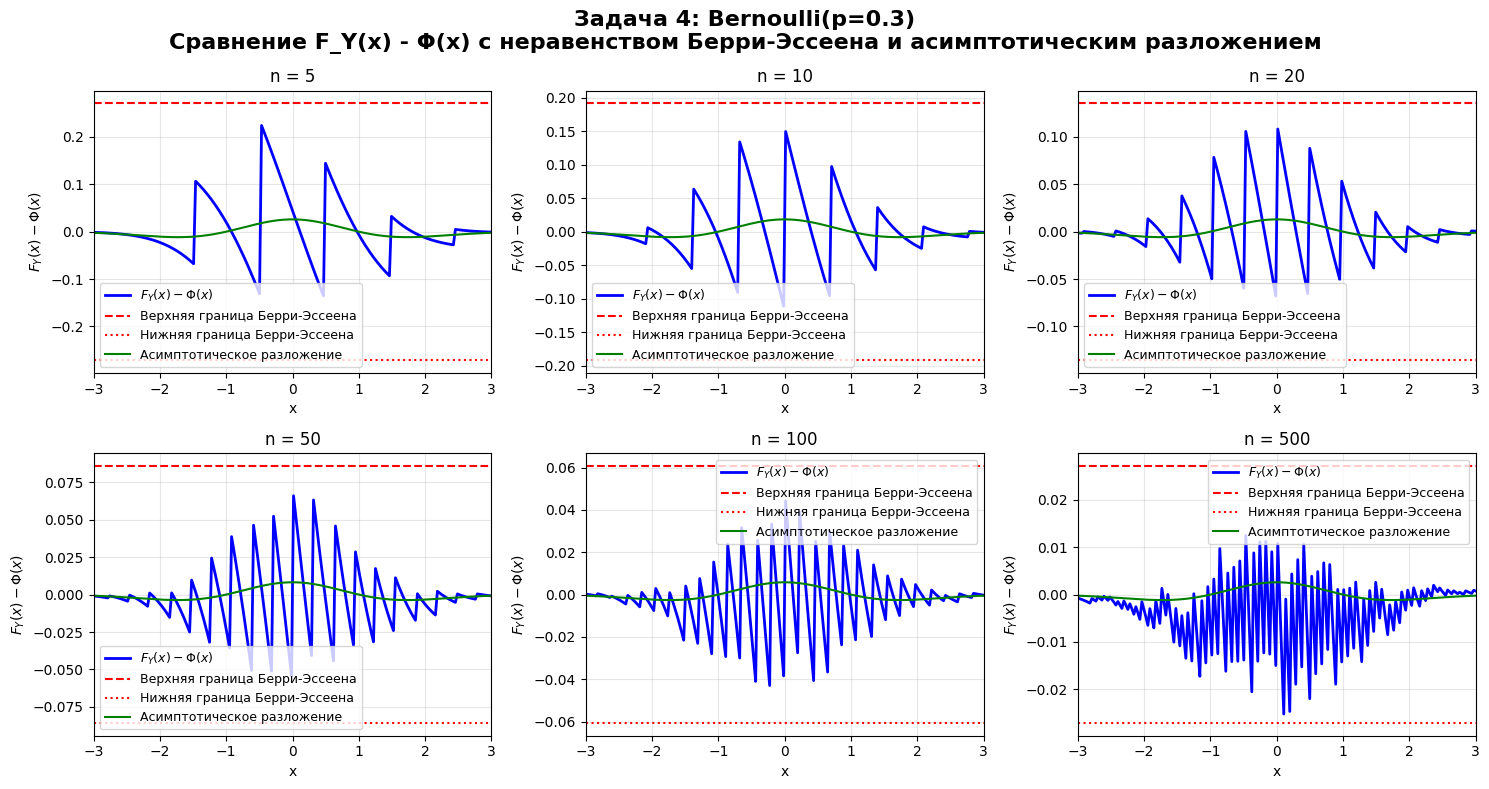


Зависимость от n:
n	Макс. отклонение	Граница Берри-Эссеена	Отношение
----------------------------------------------------------------------
5	0.184482		0.270968		0.681
10	0.119590		0.191603		0.624
20	0.080682		0.135484		0.596
50	0.054156		0.085688		0.632
100	0.057082		0.060590		0.942
500	0.018761		0.027097		0.692


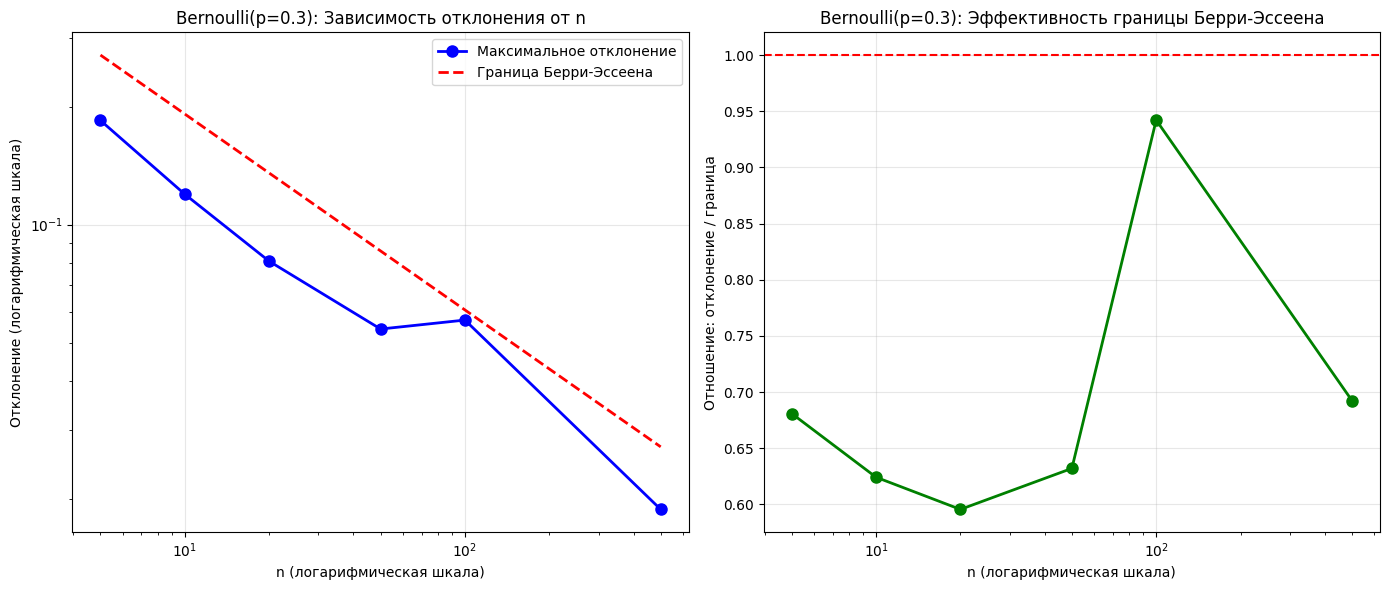

2. Распределение Бернулли: Bern(p=0.5)

----------------------------------------------------------------------
Распределение: Bernoulli(p=0.5)
----------------------------------------------------------------------
μ = 0.499959
σ = 0.500000
E|X-μ|³ = 0.125000
Коэффициент асимметрии a₃ = 0.000164
n =   5: Макс. отклонение = 0.183612, Граница Берри-Эссеена = 0.213947, Отношение = 0.858
n =  10: Макс. отклонение = 0.126586, Граница Берри-Эссеена = 0.151283, Отношение = 0.837
n =  20: Макс. отклонение = 0.086186, Граница Берри-Эссеена = 0.106973, Отношение = 0.806
n =  50: Макс. отклонение = 0.062186, Граница Берри-Эссеена = 0.067656, Отношение = 0.919
n = 100: Макс. отклонение = 0.053487, Граница Берри-Эссеена = 0.047840, Отношение = 1.118
n = 500: Макс. отклонение = 0.017133, Граница Берри-Эссеена = 0.021395, Отношение = 0.801


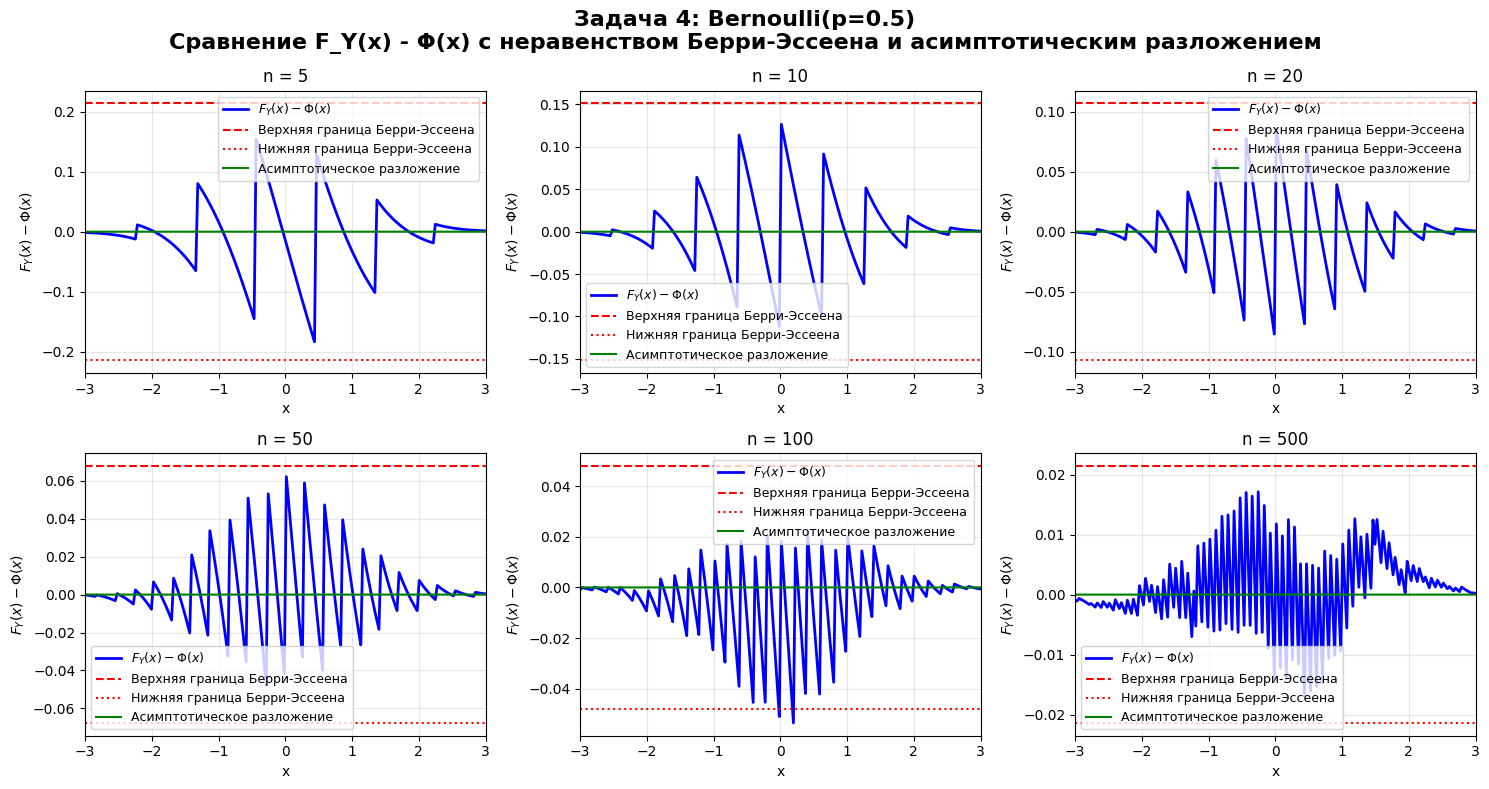


Зависимость от n:
n	Макс. отклонение	Граница Берри-Эссеена	Отношение
----------------------------------------------------------------------
5	0.172682		0.213947		0.807
10	0.108990		0.151283		0.720
20	0.081882		0.106973		0.765
50	0.049990		0.067656		0.739
100	0.036265		0.047840		0.758
500	0.021535		0.021395		1.007


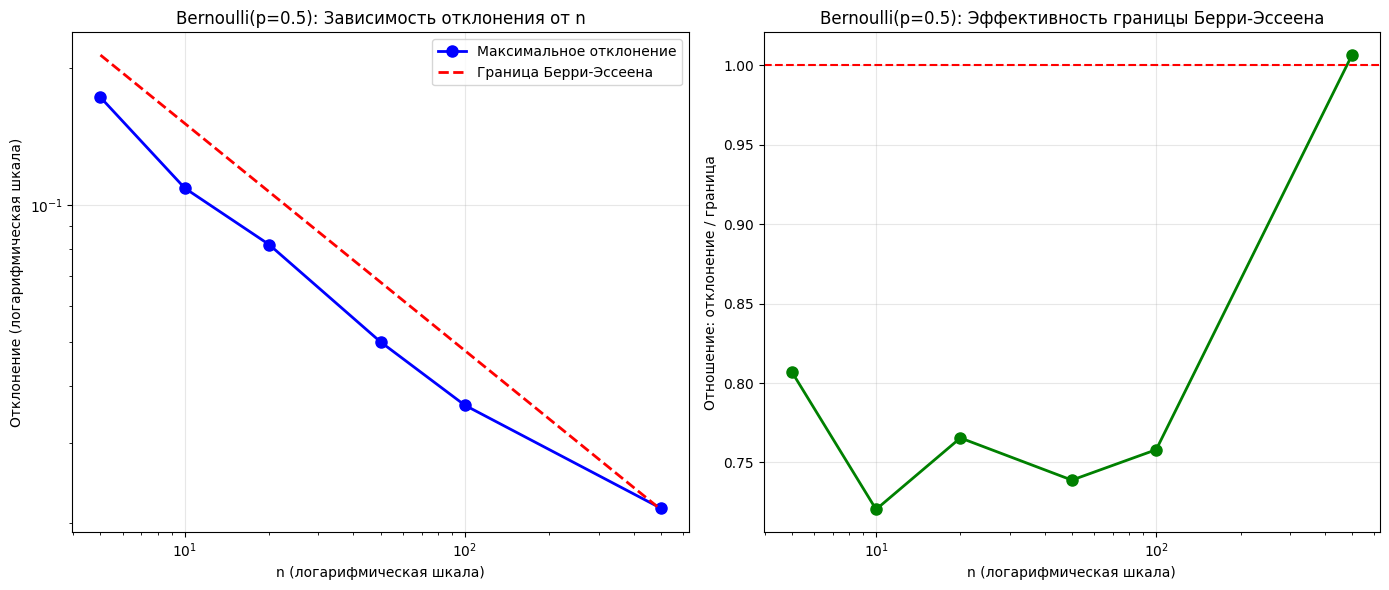

3. Экспоненциальное распределение: Exp(λ=1)

----------------------------------------------------------------------
Распределение: Exponential(λ=1)
----------------------------------------------------------------------
μ = 1.001630
σ = 1.001019
E|X-μ|³ = 2.409874
Коэффициент асимметрии a₃ = 1.987151
n =   5: Макс. отклонение = 0.066250, Граница Берри-Эссеена = 0.514012, Отношение = 0.129
n =  10: Макс. отклонение = 0.047621, Граница Берри-Эссеена = 0.363461, Отношение = 0.131
n =  20: Макс. отклонение = 0.035421, Граница Берри-Эссеена = 0.257006, Отношение = 0.138
n =  50: Макс. отклонение = 0.025043, Граница Берри-Эссеена = 0.162545, Отношение = 0.154
n = 100: Макс. отклонение = 0.026238, Граница Берри-Эссеена = 0.114937, Отношение = 0.228
n = 500: Макс. отклонение = 0.025814, Граница Берри-Эссеена = 0.051401, Отношение = 0.502


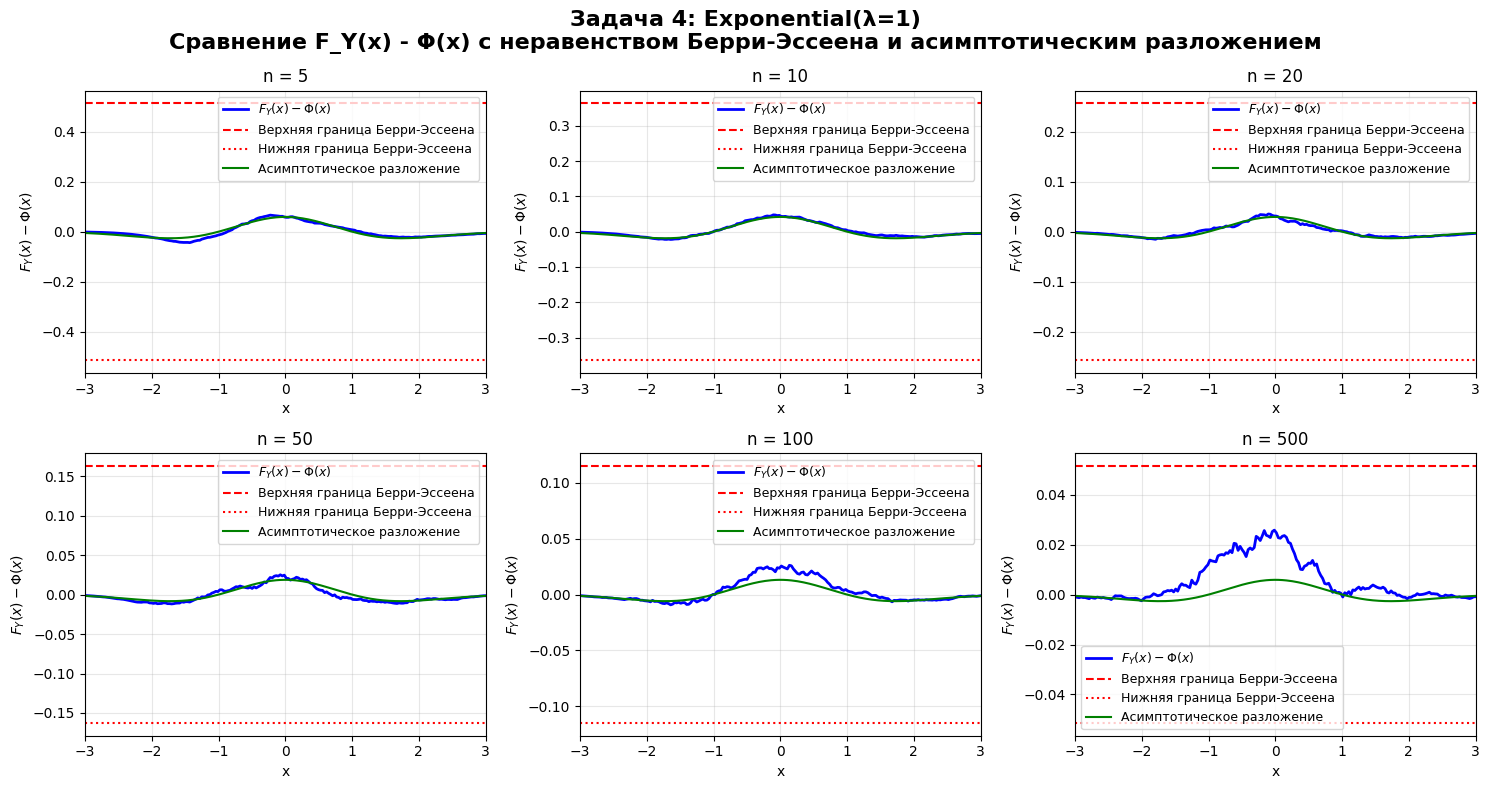


Зависимость от n:
n	Макс. отклонение	Граница Берри-Эссеена	Отношение
----------------------------------------------------------------------
5	0.059410		0.514012		0.116
10	0.048444		0.363461		0.133
20	0.028865		0.257006		0.112
50	0.029465		0.162545		0.181
100	0.025610		0.114937		0.223
500	0.028482		0.051401		0.554


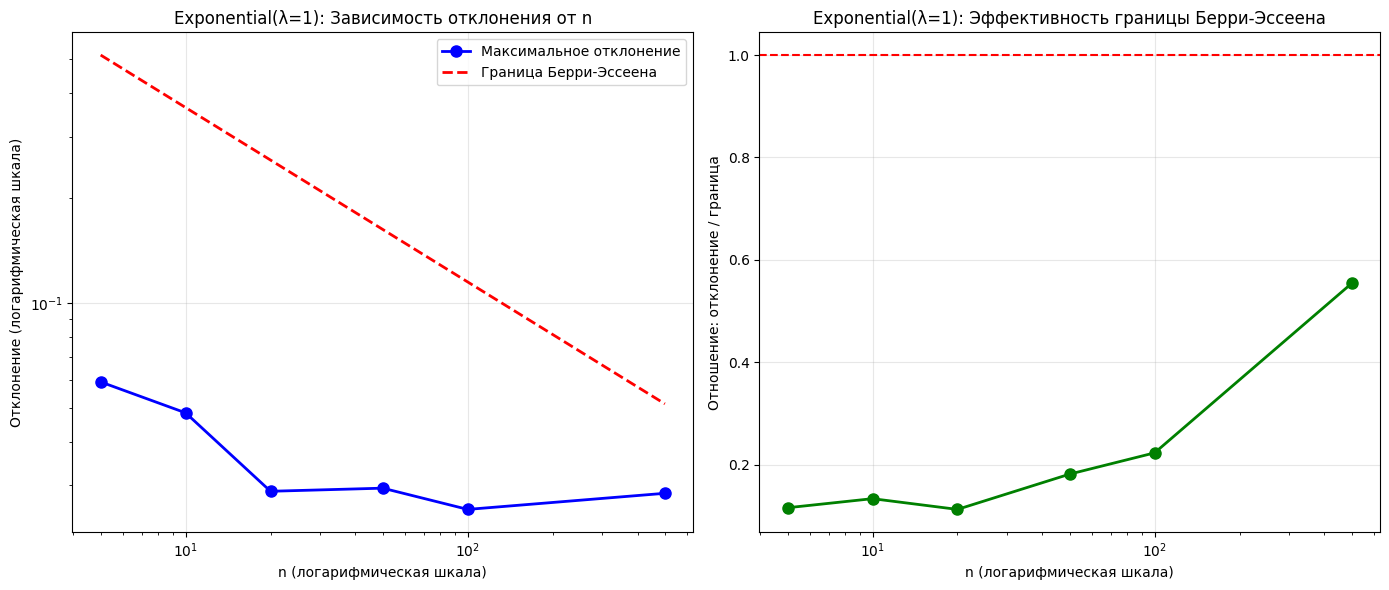

4. Экспоненциальное распределение: Exp(λ=2)

----------------------------------------------------------------------
Распределение: Exponential(λ=2)
----------------------------------------------------------------------
μ = 0.500041
σ = 0.499736
E|X-μ|³ = 0.300211
Коэффициент асимметрии a₃ = 1.990229
n =   5: Макс. отклонение = 0.063421, Граница Берри-Эссеена = 0.514647, Отношение = 0.123
n =  10: Макс. отклонение = 0.055836, Граница Берри-Эссеена = 0.363910, Отношение = 0.153
n =  20: Макс. отклонение = 0.033821, Граница Берри-Эссеена = 0.257323, Отношение = 0.131
n =  50: Макс. отклонение = 0.018986, Граница Берри-Эссеена = 0.162746, Отношение = 0.117
n = 100: Макс. отклонение = 0.015636, Граница Берри-Эссеена = 0.115079, Отношение = 0.136
n = 500: Макс. отклонение = 0.015523, Граница Берри-Эссеена = 0.051465, Отношение = 0.302


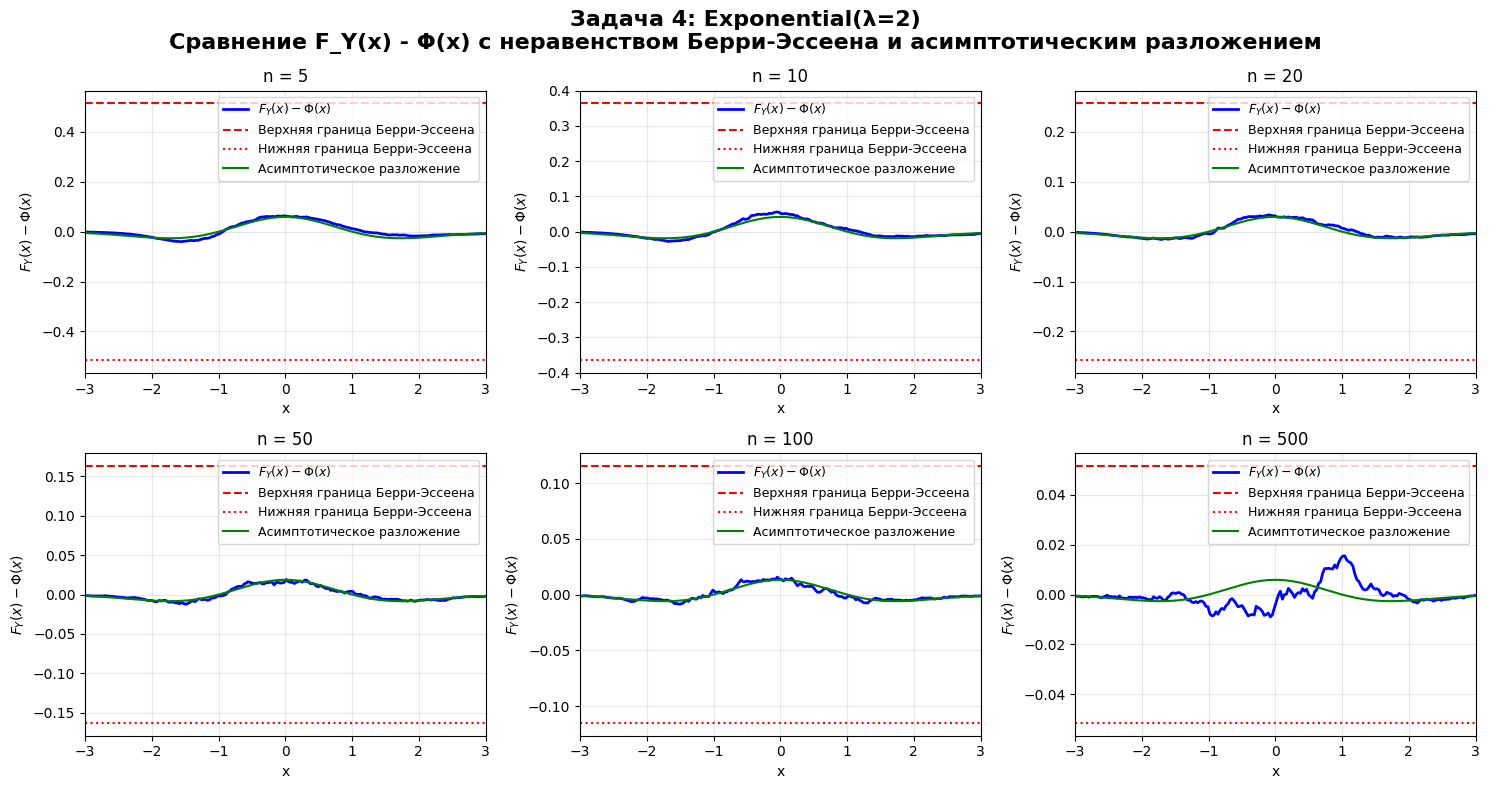


Зависимость от n:
n	Макс. отклонение	Граница Берри-Эссеена	Отношение
----------------------------------------------------------------------
5	0.054210		0.514647		0.105
10	0.031444		0.363910		0.086
20	0.036610		0.257323		0.142
50	0.019935		0.162746		0.122
100	0.018010		0.115079		0.156
500	0.008961		0.051465		0.174


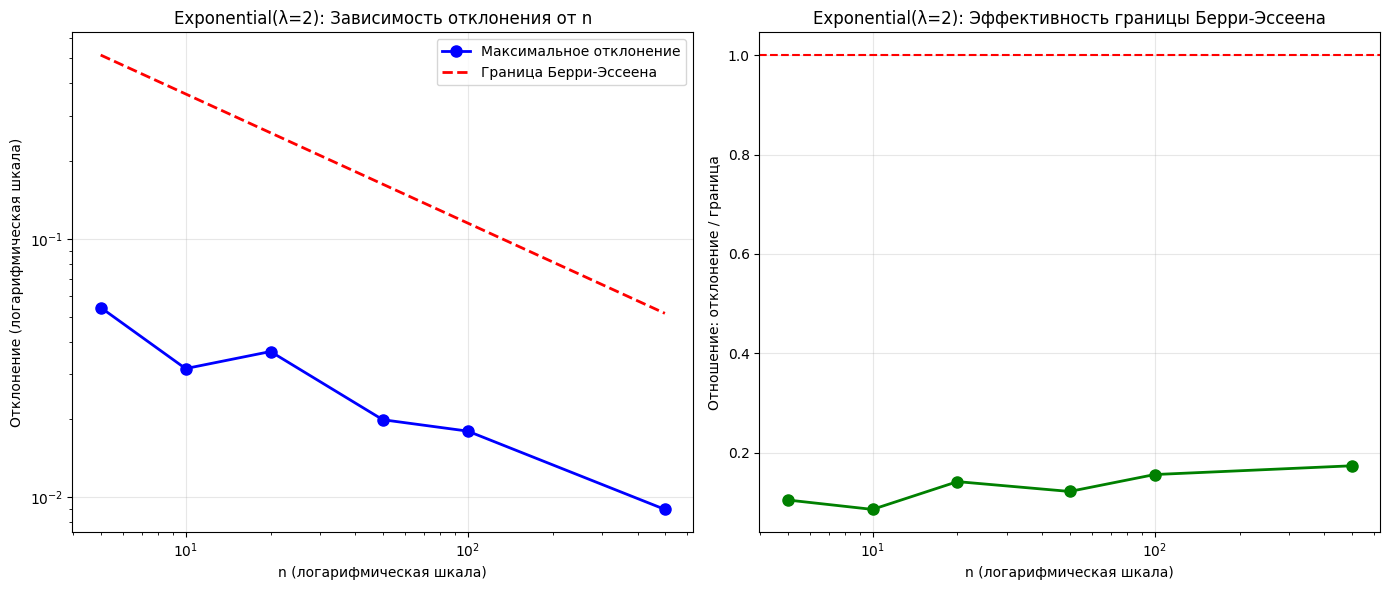

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, expon, norm
from scipy.special import gamma as gamma_func
import warnings
warnings.filterwarnings('ignore')

def compute_moments(dist_name, dist_func, params, sample_size=1000000):
    """
    Вычисление моментов распределения
    """
    # Генерация большой выборки для точной оценки моментов
    samples = dist_func(*params, size=sample_size)
    
    mu = np.mean(samples)           # Математическое ожидание
    sigma2 = np.var(samples)        # Дисперсия
    sigma = np.sqrt(sigma2)         # Стандартное отклонение
    
    # Центрированные величины
    centered = samples - mu
    
    # Абсолютный третий момент: E|X - μ|³
    abs_third_moment = np.mean(np.abs(centered)**3)
    
    # Третий центральный момент: E[(X - μ)³]
    third_moment = np.mean(centered**3)
    
    # Коэффициент асимметрии: a₃ = E[(X-μ)³]/σ³
    skewness = third_moment / (sigma**3)
    
    return {
        'mu': mu,
        'sigma': sigma,
        'sigma2': sigma2,
        'abs_third': abs_third_moment,
        'third': third_moment,
        'skewness': skewness
    }

def plot_berry_esseen_and_expansion(dist_name, dist_func, params, 
                                   n_values=[5, 10, 20, 50, 100, 500], 
                                   k=5000, x_range=(-3, 3), num_points=200):
    """

    dist_name: название распределения
    dist_func: функция для генерации случайных величин
    params: параметры распределения
    n_values: значения n (размеры сумм)
    k: количество моделируемых сумм
    x_range: диапазон x для построения графиков
    num_points: количество точек на графике
    """
    
    # 1. Вычисляем моменты распределения
    moments = compute_moments(dist_name, dist_func, params)
    mu = moments['mu']
    sigma = moments['sigma']
    abs_third = moments['abs_third']
    skewness = moments['skewness']
    
    print(f"\n{'-'*70}")
    print(f"Распределение: {dist_name}")
    print(f"{'-'*70}")
    print(f"μ = {mu:.6f}")
    print(f"σ = {sigma:.6f}")
    print(f"E|X-μ|³ = {abs_third:.6f}")
    print(f"Коэффициент асимметрии a₃ = {skewness:.6f}")
    
    # 2. Создаем сетку значений x
    x = np.linspace(x_range[0], x_range[1], num_points)
    
    # 3. Функция распределения стандартного нормального закона
    phi_x = norm.cdf(x)
    
    # 4. Создаем фигуру с подграфиками для разных n
    n_plots = len(n_values)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    fig.suptitle(f'Задача 4: {dist_name}\nСравнение F_Y(x) - Φ(x) с неравенством Берри-Эссеена и асимптотическим разложением', 
                fontsize=16, fontweight='bold')
    
    # 5. Преобразуем axes в плоский массив
    if n_plots > 1:
        axes_flat = axes.flatten()
    else:
        axes_flat = [axes]
    
    # 6. Константа Берри-Эссеена
    C = 0.4784
    
    # 7. Для каждого n строим график
    for idx, n in enumerate(n_values):
        # 8. Генерация k сумм по n слагаемых
        Y_values = []
        for _ in range(k):
            sample = dist_func(*params, size=n)
            S_n = np.sum(sample)
            Y = (S_n - n * mu) / (sigma * np.sqrt(n))
            Y_values.append(Y)
        Y_values = np.array(Y_values)
        
        # 9. Эмпирическая функция распределения для Y
        # Сортируем значения Y
        Y_sorted = np.sort(Y_values)
        
        # Создаем массив для хранения F_Y(x) - Φ(x)
        diff = np.zeros_like(x)
        
        # Для каждого x вычисляем F_Y(x) - Φ(x)
        for i, x_val in enumerate(x):
            # F_Y(x) = доля значений Y, меньших или равных x
            F_Y = np.mean(Y_values <= x_val)
            diff[i] = F_Y - phi_x[i]
        
        # 10. Правая часть неравенства Берри-Эссеена
        berry_bound = C * abs_third / (sigma**3 * np.sqrt(n))
        
        # 11. Правая часть асимптотического разложения
        # Формула: (a₃/(6√(2πn))) * (1 - x²) * exp(-x²/2)
        asymptotic = (skewness / (6 * np.sqrt(2 * np.pi * n))) * (1 - x**2) * np.exp(-x**2 / 2)
        
        # 12. Построение графиков
        ax = axes_flat[idx]
        
        # F_Y(x) - Φ(x)
        ax.plot(x, diff, 'b-', linewidth=2, label=r'$F_Y(x) - \Phi(x)$')
        
        # Верхняя граница Берри-Эссеена
        ax.axhline(y=berry_bound, color='r', linestyle='--', 
                  linewidth=1.5, label=f'Верхняя граница Берри-Эссеена')
        
        # Нижняя граница Берри-Эссеена
        ax.axhline(y=-berry_bound, color='r', linestyle=':', 
                  linewidth=1.5, label='Нижняя граница Берри-Эссеена')
        
        # Асимптотическое разложение
        ax.plot(x, asymptotic, 'g-', linewidth=1.5, 
               label='Асимптотическое разложение')
        
        # 13. Настройки графика
        ax.set_title(f'n = {n}')
        ax.set_xlabel('x')
        ax.set_ylabel(r'$F_Y(x) - \Phi(x)$')
        ax.legend(loc='best', fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(x_range)
        
        # 14. Вычисляем максимальное отклонение и сравниваем с границей
        max_diff = np.max(np.abs(diff))
        print(f"n = {n:3d}: Макс. отклонение = {max_diff:.6f}, "
              f"Граница Берри-Эссеена = {berry_bound:.6f}, "
              f"Отношение = {max_diff/berry_bound:.3f}")
    
    # 15. Убираем пустые подграфики
    for idx in range(len(n_values), len(axes_flat)):
        axes_flat[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 16. Дополнительный анализ: зависимость максимального отклонения от n
    print(f"\nЗависимость от n:")
    print("n\tМакс. отклонение\tГраница Берри-Эссеена\tОтношение")
    print("-"*70)
    
    max_deviations = []
    berry_bounds = []
    
    for n in n_values:
        # Генерация данных для этого n
        Y_values = []
        for _ in range(k):
            sample = dist_func(*params, size=n)
            S_n = np.sum(sample)
            Y = (S_n - n * mu) / (sigma * np.sqrt(n))
            Y_values.append(Y)
        Y_values = np.array(Y_values)
        
        # Вычисление максимального отклонения
        max_diff = 0
        for x_val in np.linspace(-3, 3, 50):
            F_Y = np.mean(Y_values <= x_val)
            phi_val = norm.cdf(x_val)
            diff = np.abs(F_Y - phi_val)
            if diff > max_diff:
                max_diff = diff
        
        # Граница Берри-Эссеена
        berry_bound = C * abs_third / (sigma**3 * np.sqrt(n))
        
        print(f"{n}\t{max_diff:.6f}\t\t{berry_bound:.6f}\t\t{max_diff/berry_bound:.3f}")
        
        max_deviations.append(max_diff)
        berry_bounds.append(berry_bound)
    
    # 17. График зависимости максимального отклонения от n
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Логарифмический масштаб
    ax1.loglog(n_values, max_deviations, 'bo-', linewidth=2, markersize=8, 
              label='Максимальное отклонение')
    ax1.loglog(n_values, berry_bounds, 'r--', linewidth=2, 
              label='Граница Берри-Эссеена')
    ax1.set_xlabel('n (логарифмическая шкала)')
    ax1.set_ylabel('Отклонение (логарифмическая шкала)')
    ax1.set_title(f'{dist_name}: Зависимость отклонения от n')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Обычный масштаб
    ax2.semilogx(n_values, np.array(max_deviations)/np.array(berry_bounds), 
                'go-', linewidth=2, markersize=8)
    ax2.axhline(y=1, color='r', linestyle='--', linewidth=1.5)
    ax2.set_xlabel('n (логарифмическая шкала)')
    ax2.set_ylabel('Отношение: отклонение / граница')
    ax2.set_title(f'{dist_name}: Эффективность границы Берри-Эссеена')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 1. Бернулли с p=0.3 (несимметричное распределение)
print("1. Распределение Бернулли: Bern(p=0.3)")
plot_berry_esseen_and_expansion(
    dist_name='Bernoulli(p=0.3)',
    dist_func=bernoulli.rvs,
    params=(0.3,),
    n_values=[5, 10, 20, 50, 100, 500],
    k=5000
)

# 2. Бернулли с p=0.5 (симметричное распределение)
print("2. Распределение Бернулли: Bern(p=0.5)")
plot_berry_esseen_and_expansion(
    dist_name='Bernoulli(p=0.5)',
    dist_func=bernoulli.rvs,
    params=(0.5,),
    n_values=[5, 10, 20, 50, 100, 500],
    k=5000
)

# 3. Экспоненциальное с λ=1
print("3. Экспоненциальное распределение: Exp(λ=1)")
plot_berry_esseen_and_expansion(
    dist_name='Exponential(λ=1)',
    dist_func=expon.rvs,
    params=(0, 1),  # scale=1
    n_values=[5, 10, 20, 50, 100, 500],
    k=5000
)

# 4. Экспоненциальное с λ=2
print("4. Экспоненциальное распределение: Exp(λ=2)")
plot_berry_esseen_and_expansion(
    dist_name='Exponential(λ=2)',
    dist_func=expon.rvs,
    params=(0, 0.5),  # scale=1/λ = 0.5
    n_values=[5, 10, 20, 50, 100, 500],
    k=5000
)